In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1**: 7 pts- Using

$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j},
$$

derive a Taylor series for $\cos(x^{2})$ around $x=0$.  Write a code which computes the Taylor series of $\cos(x^{2})$ using recursion and a tolerance based while loop approach.(4pts)  On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. Describe your graphs and comment on any trends you observe.(3pts)

_Answers to Problem 1_:

We see that 
$$
\cos(x^{2}) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{4j}
$$
so that the recursion scheme for the terms is found from 
$$
\frac{a_{j}(x)}{a_{j-1}(x)} = \frac{-x^{4}}{2j(2j-1)}
$$

(-17, -5)

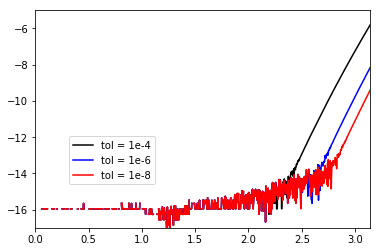

In [23]:
def cosx2(x,tol):
    tot = np.ones(x.size)
    aj = np.ones(x.size)
    x4 = -x**4.
    jj = 1
    while np.max(np.abs(aj)) >= tol:
        aj *= x4/(2.*jj*(2.*jj-1))
        tot += aj
        jj += 1
    return tot

xr = np.pi

xvals = np.linspace(0,xr,int(1e3))
ytrue = np.cos(xvals**2.)
eaprx1 = np.ma.log10(np.abs(ytrue-cosx2(xvals,1e-4)))
eaprx2 = np.ma.log10(np.abs(ytrue-cosx2(xvals,1e-6)))
eaprx3 = np.ma.log10(np.abs(ytrue-cosx2(xvals,1e-8)))

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(xvals,eaprx1,ls='-',color='k',label="tol = 1e-4")
plt.plot(xvals,eaprx2,ls='-',color='b',label="tol = 1e-6")
plt.plot(xvals,eaprx3,ls='-',color='r',label="tol = 1e-8")

plt.legend(loc=(.1,.2))

plt.xlim((0,xr))
plt.ylim((-17,-5))


As we see, we have a rather strong approximation.  As expected, the error increases as we move away from $x=0$.  However, the error at $x=\pi$ even for $tol=10^{-4}$ is on the order of $10^{-6}$, while by the time we decrease the tolerance so that $tol=10^{-8}$, the error at $x=\pi$ is on the order of $10^{-10}$, which is a four order of magnitude of improvement for a four order of magnitude decrease of the tolerance, which is about as good as we could reasonably hope for.  

**Problem 2**: 7 pts- An important function in physics is the Airy function given by the Taylor Series

$$
y_{1}(x) = 1 + \sum_{m=1}^{\infty}c_{m}x^{3m}, ~ c_{m} = \prod_{l=1}^{m} \frac{1}{(3l-1)(3l)}.
$$

Note the coefficients $c_{m}$ follow the pattern

\begin{align}
c_{1} = & \prod_{l=1}^{1} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3}\\
c_{2} = & \prod_{l=1}^{2} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3 \cdot 5 \cdot 6}
\end{align}

Using recursion and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value (4pts).  Provide plots for $L_{x}=5,15$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. (3pts)

_Answers to Problem 2_

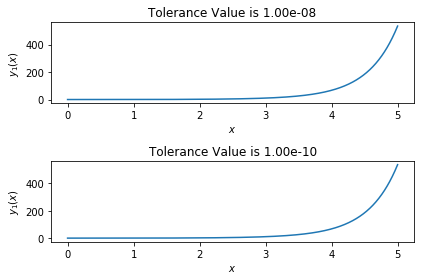

In [35]:
def airy_comp(x,tol):
    tot = np.ones(x.size)
    aj = np.ones(x.size)
    x3 = x**3.
    jj = 1
    while np.max(np.abs(aj))>=tol:
        aj *= x3/(3.*jj*(3.*jj-1))
        tot += aj
        jj += 1
    return tot

# In order to get different graphs to appear at the same time you will need to use subplot.  This gets used like

xpos05 = np.linspace(0.,5.,int(1e3))
ypos051 = airy_comp(xpos05,1e-8)
ypos052 = airy_comp(xpos05,1e-10)

plt.subplot(2,1,1)
plt.plot(xpos05,ypos051)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xpos05,ypos052)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

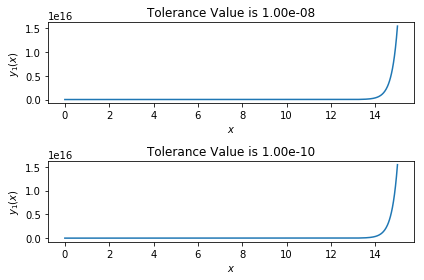

In [36]:
xpos15 = np.linspace(0.,15.,int(1e3))
ypos151 = airy_comp(xpos15,1e-8)
ypos152 = airy_comp(xpos15,1e-10)

plt.subplot(2,1,1)
plt.plot(xpos15,ypos151)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xpos15,ypos152)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

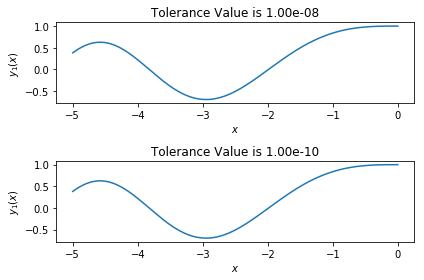

In [37]:
xneg05 = np.linspace(-5.,0.,int(1e3))
yneg051 = airy_comp(xneg05,1e-8)
yneg052 = airy_comp(xneg05,1e-10)

plt.subplot(2,1,1)
plt.plot(xneg05,yneg051)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xneg05,yneg052)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

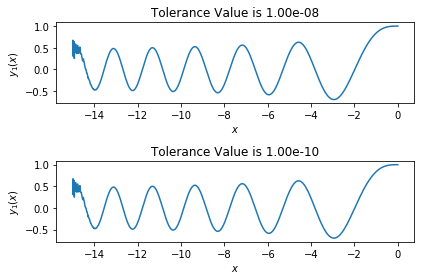

In [38]:
xneg15 = np.linspace(-15.,0.,int(1e3))
yneg151 = airy_comp(xneg15,1e-8)
yneg152 = airy_comp(xneg15,1e-10)

plt.subplot(2,1,1)
plt.plot(xneg15,yneg151)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xneg15,yneg152)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

_Provide Summary of Results for Problem 2 Here_

**Problem 3**: 5 pts- If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6, and 9.  The sum of these multiples is 23.  Find the sum of all multiples of 3 or 5 below 100.  Note, you will need to make use of the mod command `%`, which in effect finds remainders from division.  Note the use below. Likewise you will also need to use the logical operation `or`. 

_Answer to Problem 3_  

In [40]:
def weird_comp(n):
    tot = 0
    for jj in range(1,n+1):
        if jj%3==0 or jj%5==0:
            tot += jj
    print("Up to %d, the sum of all the appropriate numbers is %d"% (n,tot))

In [41]:
weird_comp(9)
weird_comp(99)

Up to 9, the sum of all the appropriate numbers is 23
Up to 99, the sum of all the appropriate numbers is 2318


**Problem 4**: 5 pts - Using a for loop based approach, write a program which finds 

$$
\frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{4} + 3\left(\frac{j}{n}\right)^{2} \right)
$$

for any positive integer n.  Generate a labeled plot of the results of your function for $1\leq n \leq 100$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph.       

_Answer to Problem 4_

In [24]:
def sum_comp(n):
    tot = 0.
    for jj in range(1,n+1):
        tot += (jj/n)**4. + 3.*(jj/n)**2.
    return tot/n

def plot_maker(nf):
    fvls = np.ones(nf)
    for jj in range(1,nf+1):
        fvls[jj-1] = sum_comp(jj)
    plt.plot(range(1,nf+1),fvls)
    plt.xlabel('$n$')
    plt.ylabel('$S_{n}$')

Limit is given by: 1.220083333000000


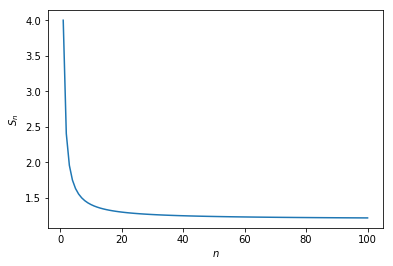

In [26]:
plot_maker(100)
print("Limit is given by: %1.15f"%sum_comp(100))

We see clearly that as $n\rightarrow \infty$, the sum converges to a value very near $1.22008333$.